In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset using pandas
filename = "../../input/prophet/V_5yr.csv"
data = pd.read_csv(filename) 
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,67.650002,67.940002,67.019997,67.050003,64.661598,4837800
1,2015-07-10,67.980003,68.540001,67.910004,68.419998,65.982765,5110200
2,2015-07-13,69.050003,69.599998,68.830002,69.519997,67.043594,6832300
3,2015-07-14,69.970001,70.300003,69.470001,70.099998,67.602936,5635400
4,2015-07-15,70.129997,70.279999,69.690002,70.019997,67.525780,4506200


In [2]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,121.376704,122.414758,120.275004,121.396823,119.792332,8.692765e+06
std,41.076898,41.531439,40.577871,41.071251,41.664470,3.824425e+06
min,64.160004,67.940002,60.000000,66.970001,64.661598,2.188800e+06
25%,80.729999,81.199997,80.350003,80.805001,78.702267,6.254050e+06
50%,115.199997,117.360001,114.019997,116.080002,114.219521,7.748800e+06
75%,155.739998,157.790001,153.595002,155.630005,154.432709,9.943250e+06
max,212.520004,214.169998,211.720001,213.309998,212.953430,4.042780e+07


In [3]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2015-07-09,67.050003
1,2015-07-10,68.419998
2,2015-07-13,69.519997
3,2015-07-14,70.099998
4,2015-07-15,70.019997


In [4]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

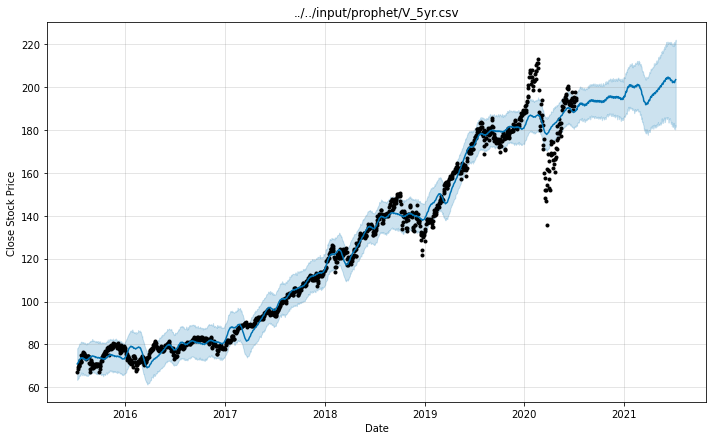

In [5]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title(filename)
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

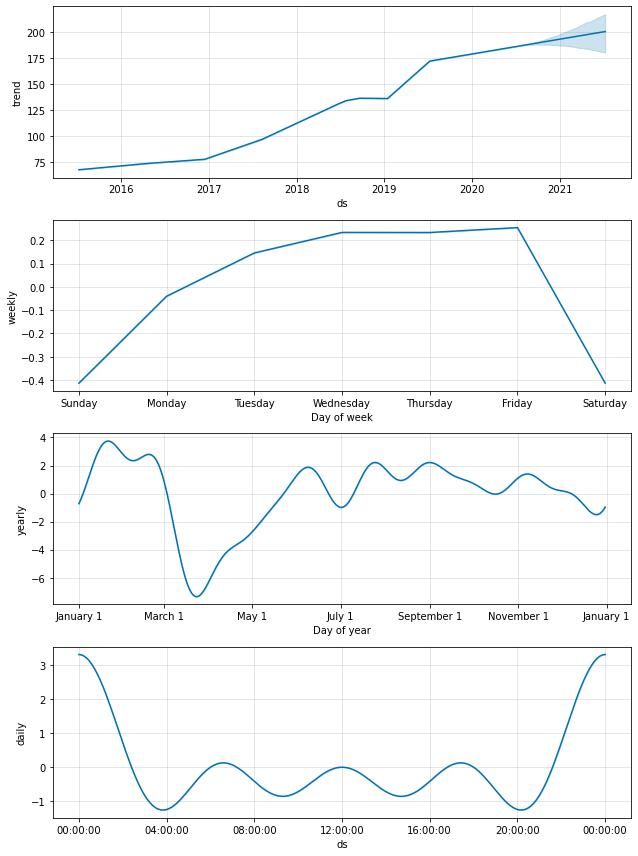

In [6]:
m.plot_components(prediction)
plt.show()